# Worked-out example for closed-form solution


Computing regression parameters (gradient descent example)

## The data


Consider the following 5 point synthetic data set:



In [2]:
import numpy as np

In [3]:
X = np.array([0, 1, 2, 3, 4])
Y =  np.array([1, 3, 7, 13, 21])

Which is plotted below:



In [4]:
import imp
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

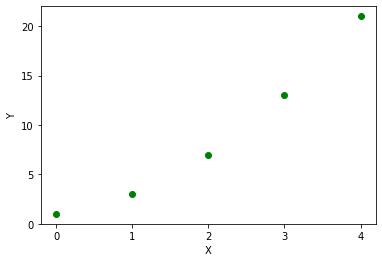

In [5]:
plt.plot(X, Y, 'go')

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

## What we need


We want the line that “best fits” this data set as measured by residual sum of squares -- the simple linear regression cost. We have a closed form solution that involves the following terms:

* The number of data points (N)

* The sum (or mean) of the Ys

* The sum (or mean) of the Xs

* The sum (or mean) of the product of the Xs and the Ys

* The sum (or mean) of the Xs squared






Then once we have calculated all of these terms, we can use the formulas to compute the slope and intercept. Recall that we first solve for the slope and then we use the value of the slope to solve for the intercept.  The formula for the slope is a fraction with:

numerator = (sum of X \* Y) - (1/N) * ((sum of X) * (sum of Y))

denominator = (sum of X^2) - (1/N) * ((sum of X) * (sum of X))

In [6]:
numerator = np.sum(X * Y) - (1/5)*(np.sum(X) * np.sum(Y))
denominator = np.sum(X * X) - (1/5)*(np.sum(X) * np.sum(X))

Note that you can divide both the numerator and denominator by N (which doesn’t change the answer!) to get:



numerator = (mean of X * Y) - (mean of X) * (mean of Y)

denominator = (mean of X^2) - (mean of X) * (mean of X)

In [7]:
numerator = np.mean(X*Y) - np.mean(X)*np.mean(Y)
denominator = np.mean(X*X) - np.mean(X)*np.mean(X)

Hence, we can use either the sum or the means.

## The formula in action

Method 1: (using sums)

* N =  5

* The sum of the Ys = 45

* The sum of the Xs = 10

* The sum of the product of the Xs and the Ys = 140

* The sum of the Xs squared = 30

So that:

In [8]:
print('numerator = ', ((140) - (1/5) * (45*10))) 
print('denominator = ',  ((30) - (1/5) * (10*10)))

numerator =  50.0
denominator =  10.0


hence:

In [9]:
print('slope = ',  numerator/denominator )

slope =  5.0


Method 2: (using means)

* The mean of the Ys = 9

* The mean of the Xs = 2

* The mean of the product of the Xs and the Ys = 28

* The mean of the Xs squared = 6

So that

In [10]:
print('numerator = ', 28 - 9*2)
print('denominator = ', 6 - 2*2)

numerator =  10
denominator =  2


hence:



In [11]:
print('slope = ',  numerator/denominator )

slope =  5.0


Then, we can use this computed slope to compute the intercept:

In [12]:
# intercept = (mean of Y) - slope * (mean of X)
print('intercept =', 9 - 5 * 2)

intercept = -1


(Food for thought: what if Y and X both have mean 0?)

In summary, we have:

**slope = 5, intercept = -1** 

Finally we can add the line to our plot from above:



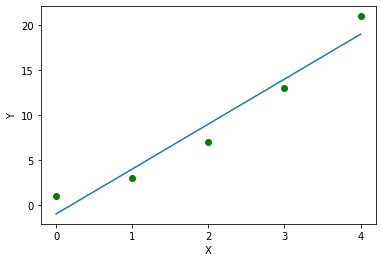

In [13]:
# X = np.array([0, 1, 2, 3, 4])
# Y =  np.array([1, 3, 7, 13, 21])

Y2 = 5 * X -1

plt.plot(X, Y, 'go')
plt.plot(X, Y2)

plt.xlabel('X')
plt.ylabel('Y')

ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

plt.show()

The solid black point included in this plot is the point (mean of X, mean of Y).  You’ll notice that this point falls exactly on the regression line! 

(Food for thought: is this always true? Hint: try plugging in (mean of X) as input into prediction = intercept + slope * input) where you use the formula for intercept). 